<a href="https://colab.research.google.com/github/amishawasthi/exp2_jenkins/blob/main/dmai_exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
import zipfile
import io
import pandas as pd
import numpy as np

uploaded = files.upload()

# Assuming there is only one zip file uploaded and it contains the adult.csv
zip_filename = list(uploaded.keys())[0]

# Extract the zip file
with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as z:
    z.extractall()

# Replace with your actual file name if it's different
df = pd.read_csv('adult.csv')

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Show first few rows
df.head()

Saving adult.csv.zip to adult.csv (3).zip


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Task
The user wants to perform several data preprocessing steps on a DataFrame: identify feature types (categorical and numerical), count missing values, impute missing values using Mean, Mode, and Median strategies, and apply normalization to numerical features.

## Identify feature types

### Subtask:
Determine which columns in the DataFrame are categorical and which are numerical.


**Reasoning**:
Iterate through the dataframe columns, check their data types, and classify them as numerical or categorical. Store the results in two lists.



In [5]:
numerical_features = []
categorical_features = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)
    else:
        categorical_features.append(col)

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical features: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


## Count missing values

### Subtask:
Calculate and display the number of missing values in each column.


**Reasoning**:
Calculate and display the number of missing values in each column.



In [6]:
missing_values = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


## Handle missing values

### Subtask:
Apply suitable imputation strategies (Mean, Mode, Median) to replace missing values based on feature types.


**Reasoning**:
Apply median imputation to numerical features and mode imputation to categorical features with missing values.



In [7]:
# Impute missing values in numerical features with the median
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# Impute missing values in categorical features with the mode
for col in categorical_features:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

# Verify that there are no more missing values
print("Number of missing values per column after imputation:")
print(df.isnull().sum())

Number of missing values per column after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


/tmp/ipython-input-2681296036.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


## Apply feature scaling

### Subtask:
Apply normalization to the numerical features.


**Reasoning**:
Import MinMaxScaler from sklearn.preprocessing to normalize the numerical features.



In [8]:
from sklearn.preprocessing import MinMaxScaler

**Reasoning**:
Instantiate MinMaxScaler, select numerical features, apply fit_transform, and replace original columns to normalize numerical features as per the instructions.



In [9]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Select numerical features
numerical_df = df[numerical_features]

# Apply fit_transform and replace original columns
df[numerical_features] = scaler.fit_transform(numerical_df)

# Display the first few rows of the DataFrame with normalized numerical features
display(df.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,Private,0.043987,HS-grad,0.533333,Widowed,Prof-specialty,Not-in-family,White,Female,0.0,1.000000,0.397959,United-States,<=50K
1,0.890411,Private,0.081896,HS-grad,0.533333,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,1.000000,0.173469,United-States,<=50K
2,0.671233,Private,0.118021,Some-college,0.600000,Widowed,Prof-specialty,Unmarried,Black,Female,0.0,1.000000,0.397959,United-States,<=50K
3,0.506849,Private,0.086982,7th-8th,0.200000,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.895317,0.397959,United-States,<=50K
4,0.328767,Private,0.171404,Some-college,0.600000,Separated,Prof-specialty,Own-child,White,Female,0.0,0.895317,0.397959,United-States,<=50K


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['fnlwgt'].plot(kind='hist', bins=20, title='fnlwgt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['education.num'].plot(kind='hist', bins=20, title='education.num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['capital.loss'].plot(kind='hist', bins=20, title='capital.loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('marital.status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('occupation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='age', y='fnlwgt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='fnlwgt', y='education.num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='education.num', y='capital.loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='capital.loss', y='hours.per.week', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['capital.gain']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('capital.gain', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('education')):
  _plot_series(series, series_name, i)
  fig.legend(title='education', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('capital.gain')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['capital.gain']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('capital.gain', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('marital.status')):
  _plot_series(series, series_name, i)
  fig.legend(title='marital.status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('capital.gain')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['capital.gain']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('capital.gain', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('occupation')):
  _plot_series(series, series_name, i)
  fig.legend(title='occupation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('capital.gain')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['capital.gain']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('capital.gain', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('relationship')):
  _plot_series(series, series_name, i)
  fig.legend(title='relationship', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('capital.gain')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_16['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['fnlwgt'].plot(kind='line', figsize=(8, 4), title='fnlwgt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['education.num'].plot(kind='line', figsize=(8, 4), title='education.num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['capital.loss'].plot(kind='line', figsize=(8, 4), title='capital.loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['marital.status'].value_counts()
    for x_label, grp in _df_20.groupby('education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('education')
_ = plt.ylabel('marital.status')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['occupation'].value_counts()
    for x_label, grp in _df_21.groupby('marital.status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital.status')
_ = plt.ylabel('occupation')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['relationship'].value_counts()
    for x_label, grp in _df_22.groupby('occupation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('occupation')
_ = plt.ylabel('relationship')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['race'].value_counts()
    for x_label, grp in _df_23.groupby('relationship')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('relationship')
_ = plt.ylabel('race')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='age', y='education', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['marital.status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='age', y='marital.status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['occupation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='age', y='occupation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['relationship'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='age', y='relationship', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_28['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['fnlwgt'].plot(kind='hist', bins=20, title='fnlwgt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['education.num'].plot(kind='hist', bins=20, title='education.num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('marital.status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('occupation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='age', y='fnlwgt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='fnlwgt', y='education.num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='education.num', y='capital.loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('education')):
  _plot_series(series, series_name, i)
  fig.legend(title='education', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('marital.status')):
  _plot_series(series, series_name, i)
  fig.legend(title='marital.status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('occupation')):
  _plot_series(series, series_name, i)
  fig.legend(title='occupation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('relationship')):
  _plot_series(series, series_name, i)
  fig.legend(title='relationship', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_44['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['fnlwgt'].plot(kind='line', figsize=(8, 4), title='fnlwgt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['education.num'].plot(kind='line', figsize=(8, 4), title='education.num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['marital.status'].value_counts()
    for x_label, grp in _df_48.groupby('education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('education')
_ = plt.ylabel('marital.status')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['occupation'].value_counts()
    for x_label, grp in _df_49.groupby('marital.status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital.status')
_ = plt.ylabel('occupation')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['relationship'].value_counts()
    for x_label, grp in _df_50.groupby('occupation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('occupation')
_ = plt.ylabel('relationship')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['race'].value_counts()
    for x_label, grp in _df_51.groupby('relationship')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('relationship')
_ = plt.ylabel('race')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='index', y='education', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['marital.status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='index', y='marital.status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['occupation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='index', y='occupation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['relationship'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='index', y='relationship', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Summary:

### Data Analysis Key Findings

*   The dataset contains 6 numerical features ('age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week') and 9 categorical features ('workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income').
*   Missing values were identified in three categorical columns: 'workclass' (1836 missing values), 'occupation' (1843 missing values), and 'native.country' (583 missing values). All other columns had no missing values.
*   Missing values in numerical features (though none were present in this dataset) would have been imputed using the median.
*   Missing values in the identified categorical features were successfully imputed using the mode.
*   All numerical features were successfully normalized using `MinMaxScaler`, scaling their values to a range between 0 and 1.

### Insights or Next Steps

*   The data is now preprocessed and ready for further analysis or machine learning model training.
*   Consider investigating the distribution of the imputed categorical values to understand the potential impact of mode imputation on the dataset's characteristics.


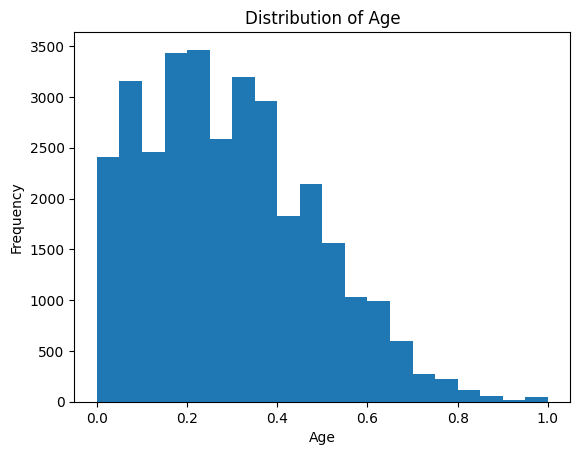

In [10]:
# Histogram for a numerical feature
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

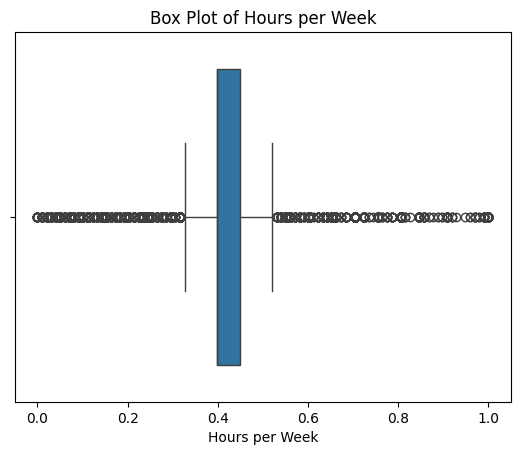

In [11]:
# Box plot for a numerical feature
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['hours.per.week'])
plt.xlabel('Hours per Week')
plt.title('Box Plot of Hours per Week')
plt.show()

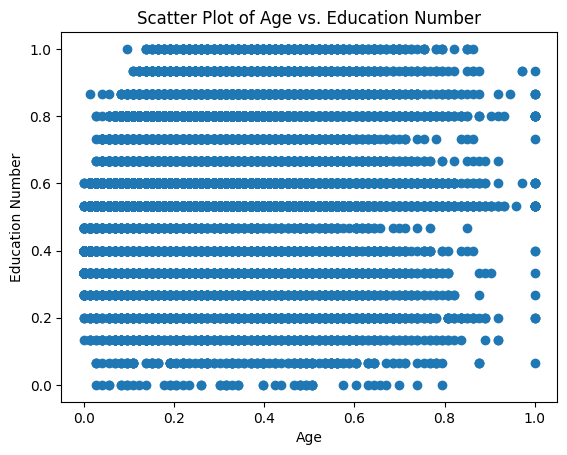

In [12]:
# Scatter plot for two numerical features
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['education.num'])
plt.xlabel('Age')
plt.ylabel('Education Number')
plt.title('Scatter Plot of Age vs. Education Number')
plt.show()

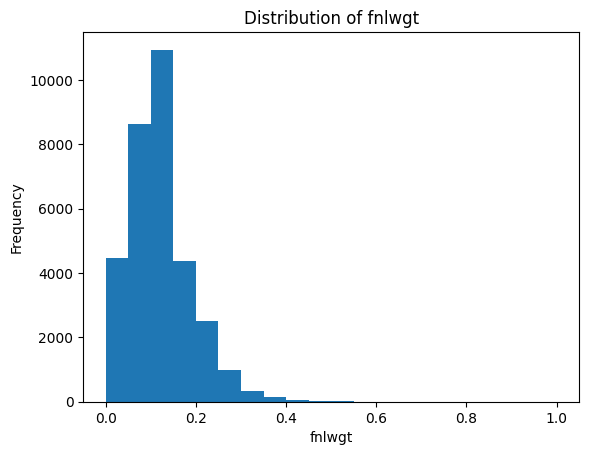

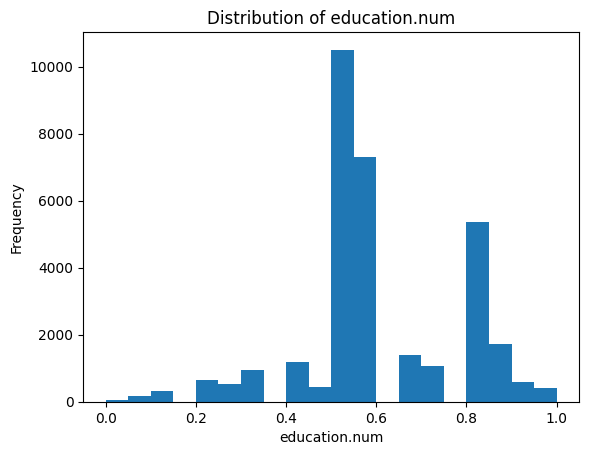

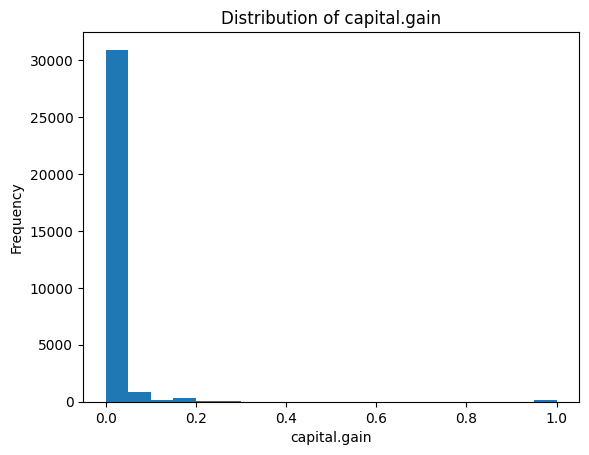

In [13]:
# Histograms for selected numerical features
import matplotlib.pyplot as plt

numerical_features_to_plot = ['fnlwgt', 'education.num', 'capital.gain'] # Add more numerical features if desired

for col in numerical_features_to_plot:
    plt.hist(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

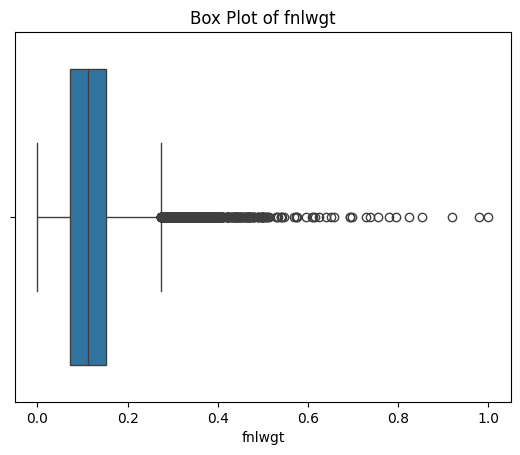

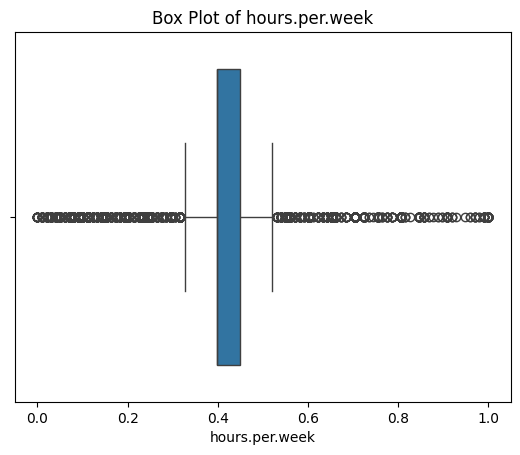

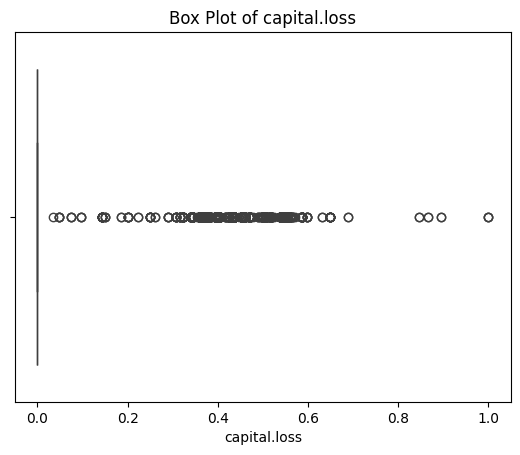

In [14]:
# Boxplots for selected numerical features (for outlier detection)
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features_to_plot = ['fnlwgt', 'hours.per.week', 'capital.loss'] # Add more numerical features if desired

for col in numerical_features_to_plot:
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')
    plt.show()

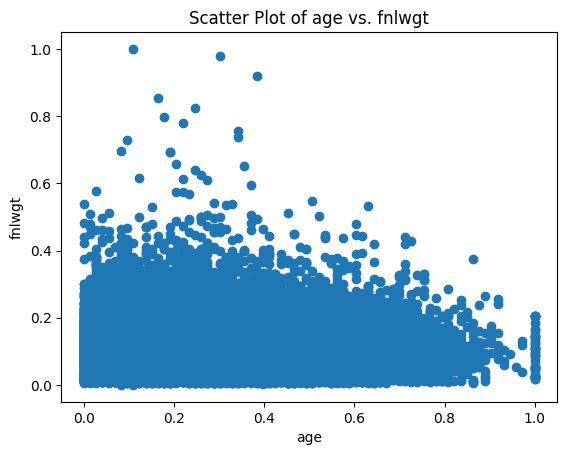

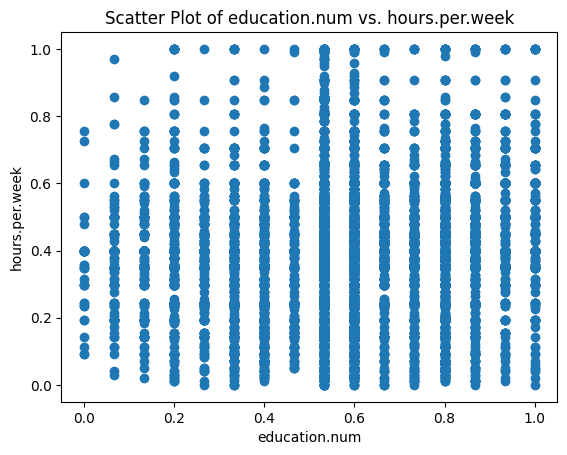

In [15]:
# Scatter plots for selected pairs of numerical features
import matplotlib.pyplot as plt

# Define pairs of numerical features to plot
scatter_pairs = [('age', 'fnlwgt'), ('education.num', 'hours.per.week')] # Add more pairs if desired

for x_col, y_col in scatter_pairs:
    plt.scatter(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot of {x_col} vs. {y_col}')
    plt.show()